In [54]:
import pandas as pd


In [55]:
# Initializing and doing initial cleaning of the dataset
shark_attacks = pd.read_excel("GSAF5.xls")

# Removing unneeded columns
cols_to_drop = shark_attacks.columns[-11:]
shark_attacks.drop(columns=cols_to_drop, inplace=True)

# Lowercasing all column names, and replacing spaces with underscores
shark_attacks.columns = shark_attacks.columns.str.lower()
shark_attacks.columns = shark_attacks.columns.str.replace(' ', '_')

# Replace all NA in the column with 0
median_year=shark_attacks["year"].median()
shark_attacks["year"]=shark_attacks["year"].fillna(median_year)

# Round the entries in the column to whole number
shark_attacks["year"]=shark_attacks["year"].round(0).astype(int)

# Filter from year 2000
mask=shark_attacks["year"] >= 2000
shark_attacks=shark_attacks[mask]

# Capitalize the first letter of each country for consistency
shark_attacks["country"] = shark_attacks["country"].str.capitalize()

# Capitalize the first letter of each state for consistency
shark_attacks["state"] = shark_attacks["state"].str.capitalize()

shark_attacks



,date,year,type,country,state,location,activity,name,sex,age,injury,fatal_y/n
0,6th September,2025,Unprovoked,Australia,Nsw,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,Both legs and arm severed,Y
1,1st September,2025,Unprovoked,Usa,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,Bite to leg,N
2,30th August,2025,Unprovoked,Usa,Texas,Galveston,Swimming,Harper Ochoa,F,8,Bite to leg,N
3,18th August,2025,Unprovoked,Australia,Nsw,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N
4,17th August,2025,Unprovoked,Bahamas,Atlantic ocean near big grand cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2789,03-Feb-2000,2000,Unprovoked,New zealand,South island,Oreti Beach (reported as the 4th person bitten...,Surfing,Michael Petas,M,12,"No injury, wetsuit punctured",N
2790,01-Feb-2000,2000,Unprovoked,Australia,South australia,"Point Sinclair, Cactus Beach near Penong",Surfing,Anthony Hayes,M,26,Hand bitten,N
2791,Reported 28-Jan-2000,2000,Watercraft,Reunion,NaN,Saint Pierre,Canoe with 3 men onboard sank,Boulabhaï Ishmael,M,NaN,FATAL,Y
2792,05-Jan-2000,2000,Unprovoked,Thailand,Phang nga province,Phang nga Island,Diving,Stephan Kahl,M,35,FATAL,Y


In [56]:
# List of keywords to identify limb injuries
keywords = ['leg', 'foot', 'thigh', 'ankle', 'lower limb', 'lower leg', 'arm', 'fingers', 'hand', 'wrist', 'elbow', 'shoulder', 'calf', 'knee', 'toe', 'toes', 'feet', 'heel']

# Function to check for limb injury keywords
def check_limb_injury(description):
    description_lower = description.lower()
    if any(keyword in description_lower for keyword in keywords):
        return True
    else:
        return False

# Apply the function to the 'Injury' column
shark_attacks['limb_injury'] = shark_attacks['injury'].astype(str).apply(check_limb_injury)


In [57]:
import matplotlib.pyplot as plt

In [58]:
# Limb injuries as percentage of attacks since 2000

limb_injuries_count = shark_attacks['limb_injury'].sum()
total_attacks_count = shark_attacks.shape[0]
percentage_limb_injuries = (limb_injuries_count / total_attacks_count) * 100
percentage_limb_injuries

np.float64(66.27282491944146)

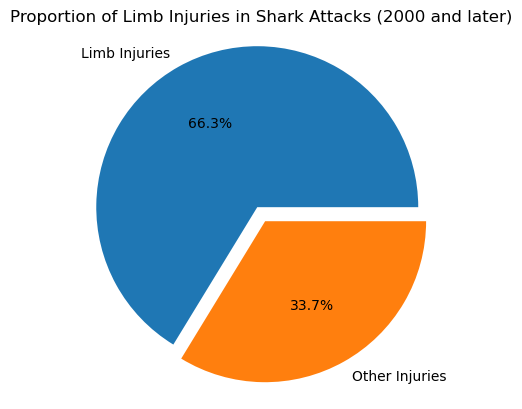

In [59]:
# Creating pie chart to display the proportion of limb injuries.

labels = ['Limb Injuries', 'Other Injuries']
y = [limb_injuries_count, total_attacks_count - limb_injuries_count]
explode = (0.1, 0)  
plt.pie(y, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Limb Injuries in Shark Attacks (2000 and later)')
plt.axis('equal')  
plt.show()

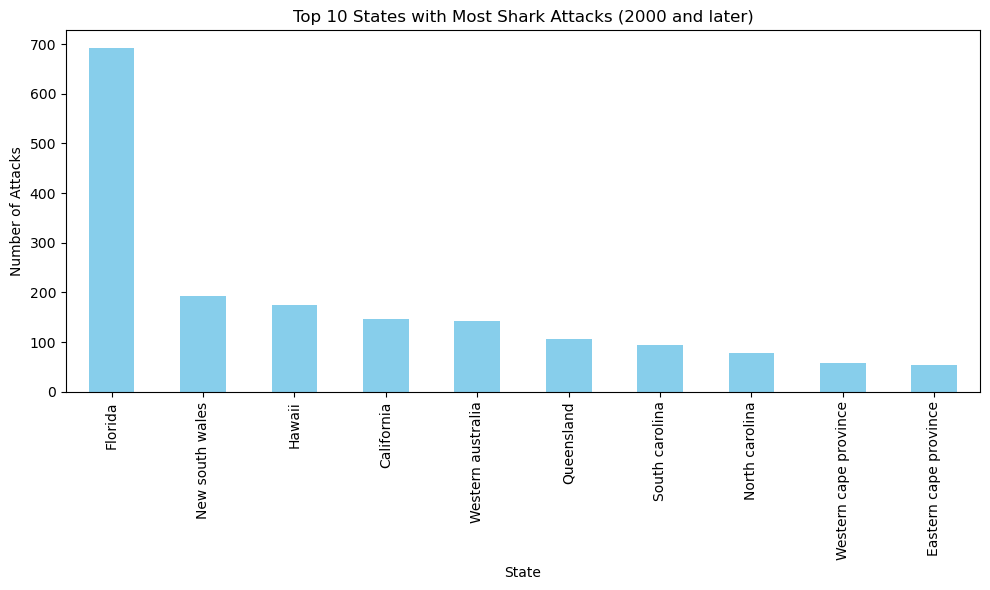

In [60]:
shark_attacks['state'].value_counts()
histogram = shark_attacks['state'].value_counts().head(10)
plt.figure(figsize=(10,6))
histogram.plot(kind='bar', color='skyblue')
plt.title('Top 10 States with Most Shark Attacks (2000 and later)')
plt.xlabel('State')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

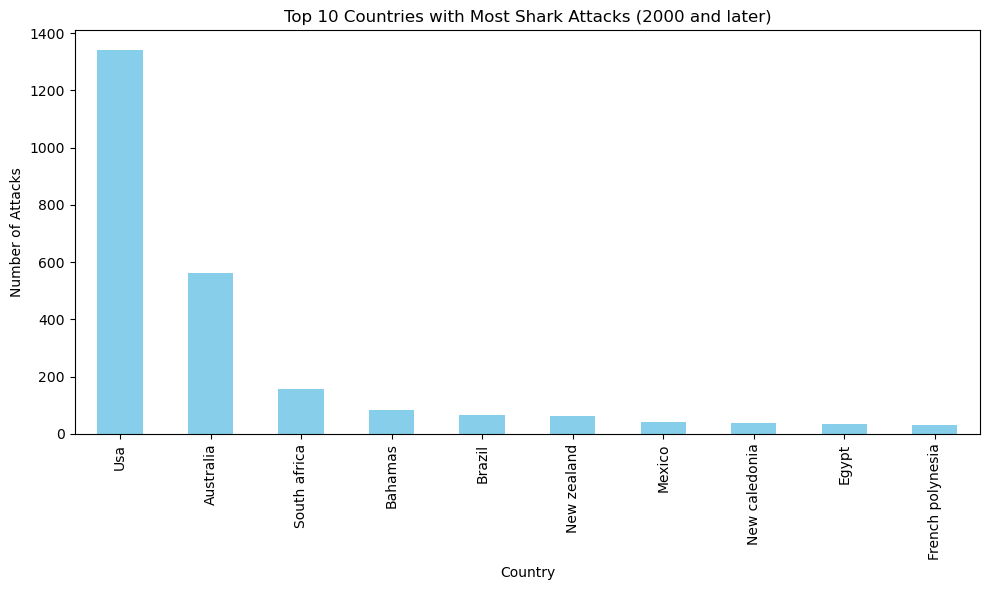

In [61]:
shark_attacks['country'].value_counts()
histogram = shark_attacks['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
histogram.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Shark Attacks (2000 and later)')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

In [62]:
# Adding conditions to investigate limb injuries in the USA

condition1 = shark_attacks['limb_injury']  == True
condition2 = shark_attacks['country'].str.contains('Usa')
filtered_df4 = shark_attacks[condition1 & condition2]

# Display the count of shark attacks by state
filtered_df4["state"].value_counts()

state
Florida                     623
Hawaii                      102
South carolina               78
North carolina               69
California                   53
Texas                        36
New york                     16
Alabama                      10
Oregon                        7
Louisiana                     6
Massachusetts                 5
Georgia                       4
New jersey                    4
Delaware                      3
Maryland                      3
Bahamas                       2
Virginia                      2
Puerto rico                   2
Guam                          2
Noirth carolina               1
Rhode island                  1
Johnston atoll                1
South carolina                1
New mexico                    1
Us virgin islands             1
Palmyra atoll                 1
Cayman islands                1
Samoa                         1
Long island ny                1
Virgin islands                1
Franklin county, florida      1
Fl

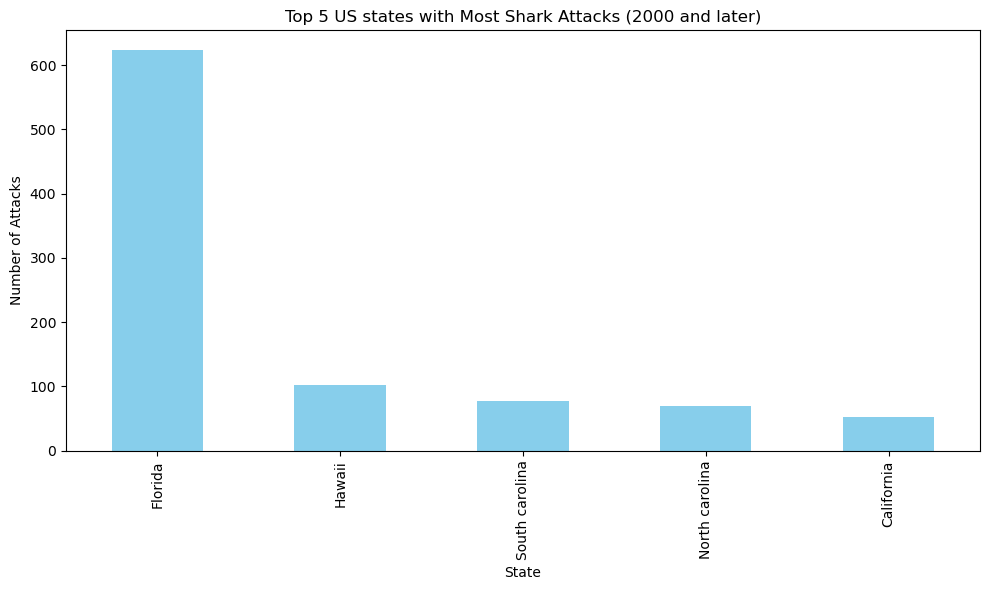

In [63]:
filtered_df4['state'].value_counts()
histogram = filtered_df4['state'].value_counts().head(5)
plt.figure(figsize=(10,6))
histogram.plot(kind='bar', color='skyblue')
plt.title('Top 5 US states with Most Shark Attacks (2000 and later)')
plt.xlabel('State')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

In [64]:
# Adding conditions to investigate limb injuries in second highest country; Australia

condition1 = shark_attacks['limb_injury']  == True
condition2 = shark_attacks['country'].str.contains('Australia')
filtered_df5 = shark_attacks[condition1 & condition2]

filtered_df5["state"].value_counts()


state
New south wales                         110
Queensland                               68
Western australia                        62
Victoria                                 18
South australia                          15
Nsw                                       4
Northern territory                        4
Tasmania                                  3
Northern territory                        3
New  south wales                          1
New south ales                            1
Western  australia                        1
Westerm australia                         1
New south wales                           1
Torres strait                             1
Territory of cocos (keeling) islands      1
Name: count, dtype: int64

In [65]:
df = pd.concat([filtered_df4, filtered_df5], axis=0)
df

,date,year,type,country,state,location,activity,name,sex,age,injury,fatal_y/n,limb_injury
1,1st September,2025,Unprovoked,Usa,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,Bite to leg,N,True
2,30th August,2025,Unprovoked,Usa,Texas,Galveston,Swimming,Harper Ochoa,F,8,Bite to leg,N,True
5,16th August,2025,Provoked,Usa,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,True
12,19th July,2025,Unprovoked,Usa,Florida,Jupiter Inlet off Jupiter Beach Palm Beach County,Diving,Jeff Joel,M,69,Lacerations to right forearm,N,True
13,18th July,2025,Unprovoked,Usa,Florida,New Smyrna Beach,Surfing,Sam Hollis,M,18,Lacerations to left foot,N,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,06-Nov-2000,2000,Unprovoked,Australia,Western australia,"Cottesloe Beach, Perth",Swimming,Dirk Avery,M,52,Leg & feet lacerated,N,True
2708,06-Nov-2000,2000,Unprovoked,Australia,Western australia,"Cottesloe Beach, Perth",Swimming,Ken Crew,M,49,"FATAL, torso bitten, leg severed",Y,True
2721,19-Sep-2000,2000,Provoked,Australia,New south wales,Wollongong,Fell onto dead shark,boy,M,12,Foot lacerated from toe to heel when he trippe...,N,True
2776,30-Mar-2000,2000,Unprovoked,Australia,Queensland,"Main Beach, Gold Coast",Swimming,Anrija (Andy) Rojcezic,M,26,Left calf bitten,N,True
